# 모두를 위한 RL 강좌
- pygame을 쓴다!?

In [1]:
import gym
env = gym.make('FrozenLake-v1')
observation = env.reset()
for _ in range(30):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(observation, reward, done, info)

2022-04-25 18:16:09.118 Python[33897:5881234] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/j5/788vvhdj6q377rgwpbpy3k580000gn/T/org.python.python.savedState


0 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
5 0.0 True {'prob': 0.3333333333333333}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}


## Optimal Policy, $\pi$ and Max $Q$
$*$  = optimal
$$
Q(\text{state}, \text{action}) \\
\\
\text{Max} Q = \max_{a'} Q(s, a') \\
\pi^*(s) = \argmax_{a} Q(s, a)
$$
### rewards

$$s_0, a_0, r_1, s_1, a_1, r_2, ..., s_{n-1}, a_{n-1}, r_n, s_n$$

$$\begin{aligned}
R &= r_1 + r_2 + ... + r_n \\
R_t &= r_t + r_{t+1} + ... + r_{n} \\
R_t &= r_t + R_{t+1} \\
\\
R^*_t &= r_t + \max R_{t+1} \\
\\
Q(s, a) &\approx r + \max_{a'} Q(s', a') \\
\hat{Q}(s,a) &\leftarrow r + \max_{a'} \hat{Q}(s', a')
\end{aligned}$$

## Dummy Q-learning algotrithm
- For each $s, a$ initialize table entry $\hat{Q}(s, a) \rightarrow 0$
- Observe current state $s$
- Do forever:
    - Select an action $a$ and execute it
    - Receive immediate reward $r$
    - Observe the new state $s'$
    - Update the table entry for $\hat{Q}(s, a)$ as follows:
        - $$\hat{Q}(s, a) \leftarrow r + \max_{a'} \hat{Q}(s', a')$$
    - $s \leftarrow s'$

success rate: 0.9555
final Q-table values
LEFT	DOWN	RIGHT	UP
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


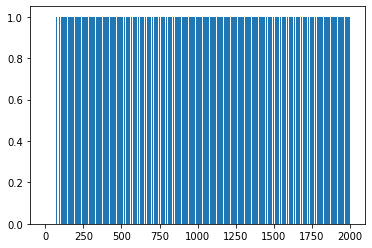

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random as pr
import gym
from gym.envs.registration import register

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

def frozen_lake_lab(epochs = 2000, 
                    learning_rate = 0.1, 
                    decaying_rate = 100, 
                    discount_rate = 0.99,
                    method = 'random_noise', 
                    size = '4x4', 
                    is_slippery = False):
    if method not in ('random noise', 'decaying e-greedy'):
        method = 'e-greedy'
    register(
        id = 'FrozenLake-v3', 
        entry_point = 'gym.envs.toy_text:FrozenLakeEnv', 
        kwargs = {'map_name' : size, 
                'is_slippery' : is_slippery}
    )

    env = gym.make('FrozenLake-v3')
    # initialize table with all zeros
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    # set learning parameters
    num_episodes = epochs
    discount = discount_rate

    # create lists to contain total rewards and steps per episode
    rList = []
    for i in range(num_episodes):
        # reset environment and get first new observation
        state = env.reset()
        rAll = 0
        done = False
        
        # decaying var
        e = 1. / ((i // decaying_rate) + 1)
        
        # the Q-table learning algorithm
        while not done:
            # decaying e-greedy
            if method == 'decaying e-greedy':
                if np.random.rand(1) < e:
                    action = env.action_space.sample()
                else:
                    action = np.argmax(Q[state, :])
            elif method == 'random noise':
                action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
            else:
                action = rargmax(Q[state, :])
            
            # add random noise
            
            # get new state and reward from environment
            new_state, reward, done, _ = env.step(action)
            
            # update Q-table with new knowledge using learning rate
            Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + discount * np.max(Q[new_state, :]))
            
            rAll += reward
            state = new_state
        rList.append(rAll)
    # print(Q)

    print(f'success rate: {str(sum(rList) / num_episodes)}')
    print('final Q-table values')
    print('LEFT\tDOWN\tRIGHT\tUP')
    print(Q)
    plt.bar(range(len(rList)), rList)
    plt.show()

frozen_lake_lab()

## Exploit vs. Exploration
- exploit은 알려진 정보만을 사용, exploration은 다 한번 가본다.

### E-greedy
- 주사위를 던진다.
```
e = 0.1
if rand < e:
    a = random
else:
    a = argmax(Q(s, a))
```
### decaying E-greedy
- 학습 할 수록 exploit쪽으로 간다.
```
for i in range(1000):
    e = 0.1 / (i + 1)
    if rand < e:
        a = random
    else:
        a = argmax(Q(s, a))
```

### add random noise
- Q 테이블에 랜덤값을 더한 다음 exploit 한다.
- decaying을 더하면, 학습 할 수록 랜덤 폭을 줄인다.

## Learning $Q(s, a)$ with discounted reward
- 최단거리를 구하기 위함. 보상을 빨리 받는게 좋다.
- 미래의 리워드를 디스카운트 해버린다.
    - $\gamma = 0.9$ 감마를 곱해준다.

$$\begin{aligned}
\hat{Q}(s, a) \rightarrow r + \gamma \times \max_{a'} \hat{Q}(s', a') \\

\end{aligned}$$

$$\begin{aligned}
R &= r_1 + r_2 + ... + r_n \\
R_t &= r_t + r_{t+1} + ... + r_{n} \\
\\
R_t &= r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + ... + \gamma^{n-t} r_n \\
&= r_t + \gamma(r_{t+1} + \gamma r_{t+2} + ...) \\
&= r_t + \gamma R_{t+1} \\
\\
R^*_t &= r_t + \gamma \max R_{t+1} \\
\end{aligned}$$

## Deterministic vs. Stochastic(nondeterministic)
- in deterministic models, the output of the model is fully determined by the parameter values and the initial conditions
- stochastic models possess some inherent randomness.
    - the same set of parameter values and initial conditions will lead to an ensemble of different outputs
- Q 학습 당시, input과 output의 관계를 믿을 수 없기 때문.
- Q를 따를 때 약간만 따르고, 업데이트할 때도 약간만 한다.

### Learning **incrementally**
$$
\hat{Q}(s, a) \leftarrow r + \gamma \max_{a'} \hat{Q}(s', a')
$$
learning rate, $\alpha$ 도입.
$$
\hat{Q}(s, a) \leftarrow (1 - \alpha) \hat{Q}(s, a) + \alpha (r + \gamma \max_{a'} \hat{Q}(s', a'))
$$

/Users/mash/Projects/mash-ML/venv-mac/lib/python3.9/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment FrozenLake-v3
  logger.warn(f"Overriding environment {id}")


success rate: 0.719
final Q-table values
LEFT	DOWN	RIGHT	UP
[[4.37487227e-01 4.33264892e-03 9.13184581e-03 2.81201412e-02]
 [2.29698775e-04 2.19016246e-04 1.69071652e-03 5.47796386e-01]
 [5.09636771e-03 6.41733141e-03 6.84495593e-03 6.29344169e-01]
 [2.69865484e-04 2.38769481e-04 1.43509748e-03 4.09395576e-01]
 [4.85869777e-01 2.27975043e-04 7.87704993e-03 1.46040692e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.12582207e-01 1.82770711e-07 2.23719688e-04 4.91863298e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.79305664e-04 8.53057914e-04 1.33164500e-03 6.98226747e-01]
 [0.00000000e+00 8.02069680e-01 1.01373489e-03 5.30900802e-04]
 [9.15017893e-01 0.00000000e+00 1.91487787e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.16332830e-03 0.00000000e+00 9.33078254e-01 0.00000000e+00]
 [0.00000000e+00 9.99089614e-01 0.00000000e+00 0.00000000e

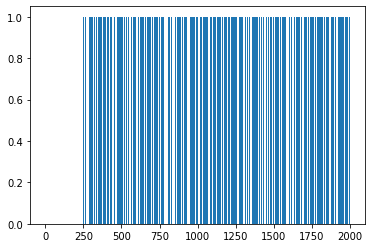

In [36]:
frozen_lake_lab(method='random noise', 
                epochs=2000, 
                learning_rate=0.85,
                is_slippery=True)

## Q-Network


### Q-function Approximation
- 네트웍을 이용. 입력은 $s$만 주고 output layer에서 모든 $a$에 대한 $Q$값을 다 출력한다.
	- 즉, $Q(s, a) \rightarrow \text{Q-value}$로 접근하는게 아니라, $Q(s) \rightarrow [Qv_1, Qv_2, Qv_3, Qv_4]$ 가 된다.


### Q-Network training (linear regression)
- $s$를 입력했을 때 linear regression에서 forward하면 출력은 $W_s$가 된다. 이 $W_s$가 optimal한 $Q^*$(label)를 만들어 내도록 학습을 해야 함.
- $H$(hypothesis)가 있고, 실제 값을 $y$라 하면 비용함수를 최소화하는 문제가 된다.
$$\begin{aligned}
H(x) &= W_x \\
\text{cost}(W) &= \frac{1}{m}\sum_{i=1}^m(W_x^{(i)} - y^{(i)})^2
\end{aligned}$$
- MSE를 떠올려보면 아래와 같이 되는데, 
$$
\begin{aligned}
\text{cost}(W) &= (W_s - y)^2 \\
y &= r + \gamma \max Q(s') \\
&= Q^*
\end{aligned}
$$
- $W_s = Q_{\text{prediction}} = \hat{Q}$ 이다. (hat은 예측값을 의미)
$$
\begin{aligned}
W_s = \hat{Q}(s, a|\theta)
\end{aligned}
$$
- $\theta$는 weight, 즉, 네트워크 자체가 된다. 네트워크를 통과한 a라는 의미.


### Q-Network training (math notation)
- 위에서, $cost(W)$는 $\hat{Q}$와 $Q^*$의 차이의 제곱이 된다. 이게 최소가 되어야 하므로, 우리가 바라는 것은 $\hat{Q}(s, a|\theta) \approx Q^*(s, a)$가 된다.

$$\min_{\theta}\sum_{t=0}^T[\hat{Q}(s_t, a_t|\theta) - (r_t + \gamma \max_{a'}\hat{Q}(s_{t+1}, a'|\theta))]^2
$$
- $\theta$(weight)를 통해 만들어 내는 예측값($\hat{Q}$)과 $Q^*$의 차의 제곱이 최소화 되는 $\theta$를 구해라. 이것이 목표!
- 전처리($\phi$) : $\phi_1 \leftarrow \phi(s_1)$, 즉, $s_1$을 전처리하면 $\phi_1$가 된다.
    - 이미지를 처리 가능한 데이터화 하는 등의 작업
    - 간단한 상황에서는 $\phi \approx s$


### pseudo code @deepmind
- Initialize action-value function $Q$ with random weights
- for $\text{episode} = 1, M$ do
    - Initialize sequence $s_1 = \{x_1\}$ and preprocessed sequenced $\phi_1 = \phi(s_1)$
    - for $t = 1, T$ do
	    - With probability $\epsilon$ select a random action $a_t$
	    - otherwise select $a_t = \max_a Q^* (\phi(s_t, a|\theta)$
	    - Execute action $a_t$ in gym and observe reward $r_t$ and image $x_{t+1}$
	    - Set $s_{t+1} = s_t, a_t, x_{t+1}$ and preprocess $\phi_{t+1} = \phi(s_{t+1})$
	    - Set $y_j = \begin{cases}r_j & \text{for terminal} \phi_{j+1}\\r_j + \gamma \max_{a'} Q(\phi_{j+1}, a'|\theta) & \text{for non-terminal} \phi_{j+1} \end{cases}$
	    - Perform a gradient descent step on $(y_j - Q(\phi_j, a_j|\theta))^2$ according to equation 3
	- end for
- end for


### Y label and loss function

Set $y_j = \begin{cases}r_j & \text{for terminal} \phi_{j+1}\\r_j + \gamma \max_{a'} Q(\phi_{j+1}, a'|\theta) & \text{for non-terminal} \phi_{j+1} \end{cases}$
Perform a **gradient descent** step on ==**loss function**== : $(y_j - Q(\phi_j, a_j|\theta))^2$ according to equation 3

- terminal : 마지막 상태 (즉, goal에 도착)
- $r_j$는 해당 상태에서의 reward. 즉, goal에서만 1점이고 나머지는 모두 0점.


### Deterministic or Stochastic?
- target으로 lerning rate $\alpha$가 적용된 값을 주지 않아도 되는지?
- 된다. linear regression하면서 어차피 일어나게 되어 있으니.


### Convergence
$$
\begin{aligned}
\min_{\theta}\sum_{t=0}^T[\hat{Q}(s_t, a_t|\theta) - (r_t + \gamma \max_{a'}\hat{Q}(s_{t+1}, a'|\theta))]^2
\end{aligned}
$$
- Converges to $Q^*$ using table lookup representation
	- 테이블의 경우는 converge 한다.
- But ==**diverges**== using neural networks due to;
	- Correlations between samples
	- Non-stationary targets
- 뉴럴넷에서는 converge가 안되므로 학습이 안되는데... 딥마인드에서 해법을 내놓았다. ==**DQN
- DQN: Deep, Replay, Separated networks 

### 실습
- One-hot 인코딩
    - state를 전달할 때, 전체 state 사이즈의 배열을 만들고 전달하려는 state만 1을 켜서 만드는 기법.

success rate : 54.50000000000001%


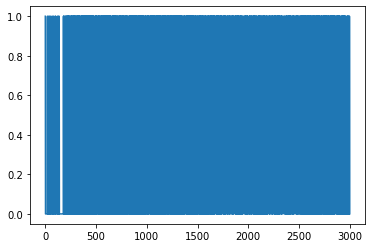

In [38]:
# One-hot encoding
import numpy as np

def one_hot(x, size=16):
    return np.identity(size)[x:x + 1]


# import tensorflow.compat.v1 as tf
from tensorflow import compat
# 버전 차이때문에 v1의 것을 끌어다 사용
tf = compat.v1
tf.compat.v1.disable_eager_execution()

import gym
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1')
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

# establish the feed-forward part of the network used to choose actions
X = tf.placeholder(shape = [1, input_size], dtype = tf.float32) # state input
W = tf.Variable(tf.random.uniform([input_size, output_size], 0, 0.01))  # weight

Q_hat = tf.matmul(X, W) # out Q prediction
Y = tf.placeholder(shape = [1, output_size], dtype = tf.float32)   # Y label

loss = tf.reduce_sum(tf.square(Y - Q_hat))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

# set Q-learning related parameters
discount = .99
num_episodes = 3000

# create lists to contain total rewards and steps per episode
rList = []

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # reset env and get first new observation
        s = env.reset()
        e = 1. / ((i // 50) + 10)
        rAll = 0
        done = False
        local_loss = []
        
        # Q-Network training !
        while not done:
            # choose an action by greedily (with e chance of random action) from q-network
            Qs = sess.run(Q_hat, feed_dict = {X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)
            
            # get new state and reward from environment
            s1, reward, done, info = env.step(a)
            
            if done:
                # update Q, and no Q_s1, because it's terminal state
                Qs[0, a] = reward
                # (1, 16) X (16, 4) matmul 한 결과이므로 (1, 4)의 shape을 가지게 되고, [0, a]로 접근 가능
            else:
                # obtain the Q_s1 values by feeding the new state through our network
                Qs1 = sess.run(Q_hat, feed_dict = {X: one_hot(s1)})
                # update Qs
                Qs[0, a] = reward + discount * np.max(Qs1)
            
            # train our network using target (Y) and predicted Q (q_hat) values
            sess.run(train, feed_dict = {X: one_hot(s), Y: Qs})
            
            rAll += reward
            s = s1
        rList.append(rAll)
    
print(f'success rate : {str(sum(rList) / num_episodes * 100)}%')
plt.plot(rList)